# Practical 5

## Further Applications of CNNs and RNNs


In [26]:
!unzip data.zip

Archive:  data.zip
replace data/cat.jpeg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: data/cat.jpeg           
  inflating: data/dog.jpeg           
  inflating: data/headlines.csv      
  inflating: data/hybrid/train/hybrid/dc19.jpeg  
  inflating: data/hybrid/train/hybrid/dc20.jpeg  
  inflating: data/hybrid/train/hybrid/dc21.jpeg  
  inflating: data/hybrid/train/hybrid/dc23.jpeg  
  inflating: data/hybrid/train/hybrid/dc24.jpeg  
  inflating: data/hybrid/train/hybrid/dh1.jpeg  
  inflating: data/hybrid/train/hybrid/dh10.jpeg  
  inflating: data/hybrid/train/hybrid/dh11.jpeg  
  inflating: data/hybrid/train/hybrid/dh12.jpeg  
  inflating: data/hybrid/train/hybrid/dh14.jpeg  
  inflating: data/hybrid/train/hybrid/dh15.jpeg  
  inflating: data/hybrid/train/hybrid/dh16.jpeg  
  inflating: data/hybrid/train/hybrid/dh17.jpeg  
  inflating: data/hybrid/train/hybrid/dh2.jpeg  
  inflating: data/hybrid/train/hybrid/dh3.jpeg  
  inflating: data/hybrid/train/hybrid/dh4.jpeg  
  inflat

## Using a pretrained model

Pre-trained models have been trained with large amounts of data and are useful when we don't have enough data for our problem. Many good pretrained models that can classify 1000 different categories can be found on ImageNet. A list of available models can be found here https://keras.io/api/applications/#available-models). Let's say we are interested in classifying  cat breeds or dog breeds. The model that we will use is a common one called VGG16.

In [3]:
from tensorflow.keras.applications import VGG16

# first, load the model
model = VGG16(weights="imagenet")

553467096/553467096 [==============================] - 5s 0us/step


We can take a look at the model structure by calling model.summary. Do take a note about the input and outputs of the model.

In [4]:
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

For VGG16, the input image shape is 224x224x3, while the output has shape 1000. Therefore it can recognize many different objects.

Let's load and display an image.

(168, 299, 3)


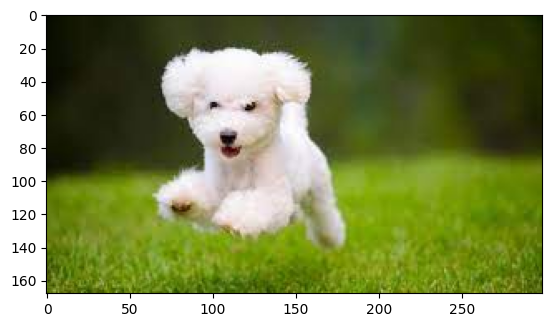

In [8]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def show_image(image_path):
    image = mpimg.imread(image_path)
    print(image.shape)
    plt.imshow(image)

show_image("data/dog.jpeg")

Since the input shape is not appropriate for the model, we will need to reshape the input. For pretrained models, we can use the preprocess_input method (https://www.tensorflow.org/api_docs/python/tf/keras/applications/vgg16/preprocess_input).

In [9]:
from tensorflow.keras.preprocessing import image as image_utils
from tensorflow.keras.applications.vgg16 import preprocess_input

def load_and_process_image(image_path):
    print('Original image shape: ', mpimg.imread(image_path).shape)

    # Load image and resize of 224, 224
    image = image_utils.load_img(image_path, target_size=(224, 224))
    # Convert the image from a PIL format to a numpy array
    image = image_utils.img_to_array(image)
    # Add a dimension for number of images, in our case 1
    image = image.reshape(1,224,224,3)
    # Preprocess image to align with original ImageNet dataset
    image = preprocess_input(image)
    #display processed image
    image2=image.squeeze()
    image2=image2/255
    plt.imshow(image2)
    # Print image's shape after processing
    print('Processed image shape: ', image.shape)
    return image

Original image shape:  (168, 299, 3)
Processed image shape:  (1, 224, 224, 3)


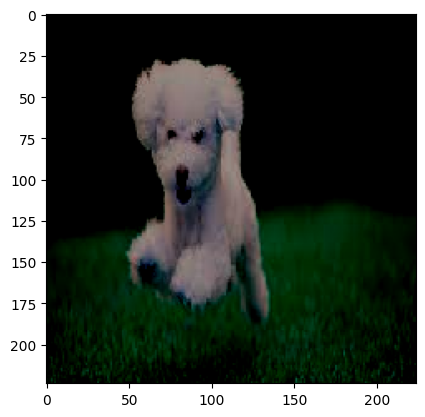

In [10]:
processed_image = load_and_process_image("data/dog.jpeg")

We can now use the preprocessed picture as input into the model. We can use the decode_predictions function to get a readable output for pretrained models. Lets try an image of a cat and a dog.

In [11]:
from tensorflow.keras.applications.vgg16 import decode_predictions

def readable_prediction(image_path):
    # Load and pre-process image
    image = load_and_process_image(image_path)
    # Make predictions
    predictions = model.predict(image)
    # Print predictions in readable form
    print('Predicted:', decode_predictions(predictions, top=3))

Original image shape:  (168, 299, 3)
Processed image shape:  (1, 224, 224, 3)
35363/35363 [==============================] - 0s 0us/step
Predicted: [[('n02093647', 'Bedlington_terrier', 0.41719392), ('n02113799', 'standard_poodle', 0.2785431), ('n02105641', 'Old_English_sheepdog', 0.1915487)]]


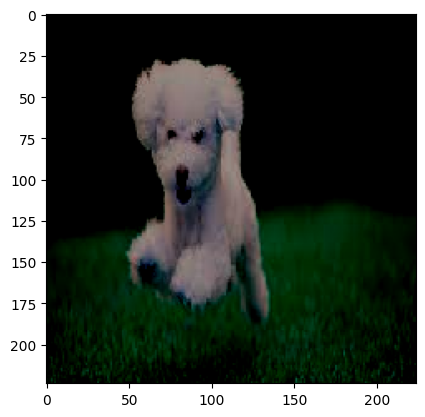

In [12]:
readable_prediction("data/dog.jpeg")

Original image shape:  (259, 194, 3)
Processed image shape:  (1, 224, 224, 3)
1/1 [==============================] - 0s 17ms/step
Predicted: [[('n02123045', 'tabby', 0.41955525), ('n02124075', 'Egyptian_cat', 0.26962593), ('n02123159', 'tiger_cat', 0.11835397)]]


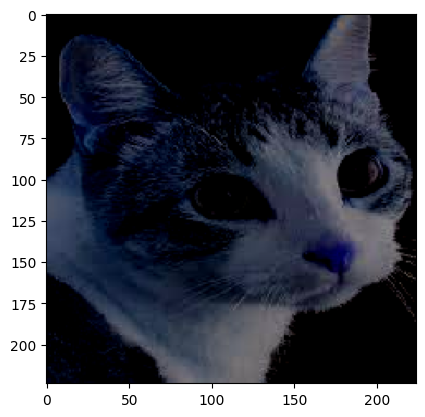

In [13]:
readable_prediction("data/cat.jpeg")

## Transfer learning with VGG16
VGG16 can only recognize the 1000 objects that it is trained on. What if we want to recognize an object not in the training set? In this case, we can use transfer learning. We will use transfer learning with a VGG16 model to differentiate a cat-dog hybrid from cats or dogs. As the VGG16 model has an output layer of 1000 units, we need to remove this and add our own layer. We also need to freeze all the other layers so that the weights won't be changed.



In [14]:
from tensorflow import keras

base_model = keras.applications.VGG16(
    weights='imagenet',  # Load weights pre-trained on ImageNet.
    input_shape=(224, 224, 3),
    include_top=False)

base_model.summary()

58889256/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                              

In [15]:
base_model.trainable = False

inputs = keras.Input(shape=(224, 224, 3))

x = base_model(inputs)

x = keras.layers.Flatten()(x)
# A Dense classifier with a single unit (binary classification)
outputs = keras.layers.Dense(1, activation='sigmoid')(x)
model = keras.Model(inputs, outputs)

In [16]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 1)                 25089     
                                                                 
Total params: 14739777 (56.23 MB)
Trainable params: 25089 (98.00 KB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


We can compile the model and augment the data.

In [17]:
model.compile(loss=keras.losses.BinaryCrossentropy(), metrics=[keras.metrics.BinaryAccuracy()])

In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create a data generator
datagen_train = ImageDataGenerator(
    samplewise_center=True,  # set each sample mean to 0
    rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
    zoom_range=0.1,  # Randomly zoom image
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images
    vertical_flip=False,
)  # we don't expect Bo to be upside-down so we will not flip vertically

# No need to augment validation data
datagen_valid = ImageDataGenerator(samplewise_center=True)

In [19]:
# load and iterate training dataset
train_it = datagen_train.flow_from_directory(
    "data/hybrid/train/",
    target_size=(224, 224),
    color_mode="rgb",
    class_mode="binary",
    batch_size=8,
)

# load and iterate validation dataset
valid_it = datagen_valid.flow_from_directory(
    "data/hybrid/valid/",
    target_size=(224, 224),
    color_mode="rgb",
    class_mode="binary",
    batch_size=8,
)

Found 138 images belonging to 2 classes.
Found 26 images belonging to 2 classes.


Now we are ready to train the mode. Remember set the steps_per_epoch = size of data / batch size

In [ ]:
model.fit(train_it, steps_per_epoch=18, validation_data=valid_it, validation_steps=4, epochs=2)

Epoch 1/2
18/18 [==============================] - 7s 186ms/step - loss: 10.0194 - binary_accuracy: 0.8043 - val_loss: 4.5869 - val_binary_accuracy: 0.8462
Epoch 2/2
18/18 [==============================] - 2s 112ms/step - loss: 1.9976 - binary_accuracy: 0.8986 - val_loss: 9.6899 - val_binary_accuracy: 0.7692


## Text Generator

Let us create a simple text generator using RNNs. We will use news headlines to generate this text generator. We will read in the headlines from a csv file.

In [30]:
import os
import pandas as pd

all_headlines3=pd.read_csv("data/headlines.csv")
headlines=all_headlines3.iloc[:,2]
headlines=list(headlines)
headlines[:10]


['Amid the Clutter Lies Some Clarity',
 'The Outrage  Over Kevin  Williamson',
 'China Moves To Open Itself To Carmakers From Abroad',
 'A Parasitic Threat',
 'Hockey Fans Beware! Heart Attack Rates Rise After a Game',
 'A Golden Age  For Drag?',
 'Call Letters That Ask a Question',
 'Don’t Believe the Liberal F.B.I.',
 'Pressed Into Caregiving Too Soon',
 'Policy Shifts Hint at Who Has White House Sway']

We will first need to split the text data into words so that the model can use it. This process is the tokenization step. We can use the Keras Tokenizer to do this. The Tokenizer will also remove punctuation and make sentecnes lower case. You can take a look at the [Tokenizer](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/text/Tokenizer) class in Keras to see the default values.

In [32]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(headlines)
total_words = len(tokenizer.word_index) + 1
print('Total words: ', total_words)

Total words:  10361


Below is the effect of tokenizing the words

In [35]:
# Print a subset of the word_index dictionary created by Tokenizer
subset_dict = {key: value for key, value in tokenizer.word_index.items() \
               if key in ['amid','the ','clutter','lies','some','clarity']}
print(subset_dict)
tokenizer.texts_to_sequences(['amid','the ','clutter','lies','some','clarity'])

{'some': 124, 'amid': 635, 'lies': 636, 'clutter': 4484, 'clarity': 4485}


[[635], [1], [4484], [636], [124], [4485]]

We also need to create partial sequences so that we can train the model to predict the next word. For example, if the sequence is 'amid the' we want to predict 'clutter'. Let's create partial sequences of minimum length 2 first.

In [37]:
# Convert data to sequence of tokens
input_sequences = []
for line in headlines:
    # Convert our headline into a sequence of tokens
    token_list = tokenizer.texts_to_sequences([line])[0]

    # Create a series of sequences for each headline
    for i in range(1, len(token_list)):
        partial_sequence = token_list[:i+1]
        input_sequences.append(partial_sequence)

print(tokenizer.sequences_to_texts(input_sequences[:5]))
input_sequences[:5]

['amid the', 'amid the clutter', 'amid the clutter lies', 'amid the clutter lies some', 'amid the clutter lies some clarity']


[[635, 1],
 [635, 1, 4484],
 [635, 1, 4484, 636],
 [635, 1, 4484, 636, 124],
 [635, 1, 4484, 636, 124, 4485]]

The deep learning model requires sequences to be of fixed legnth. This can be done using padding.

In [38]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

# Determine max sequence length
max_sequence_len = max([len(x) for x in input_sequences])

# Pad all sequences with zeros at the beginning to make them all max length
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))
input_sequences[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
       635,   1], dtype=int32)

Recall that the target/label is the last word. We therefore need to remove the last word and keep it as the label

In [56]:
from tensorflow.keras import utils


# inputs are every word except the last
inputs = input_sequences[:,:-1]
# Labels are the last word
labels = input_sequences[:,-1]
#one hot encoding
labels = utils.to_categorical(labels, num_classes=total_words)

We are now ready to create an LSTM model to predict the next word

In [44]:
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.models import Sequential

# Input is max sequence length - 1, as last word/label is removed
input_len = max_sequence_len - 1

model = Sequential()

# Add input embedding layer
model.add(Embedding(total_words, 10, input_length=input_len))

# Add LSTM layer with 200 units
model.add(LSTM(200))

# Add output layer
model.add(Dense(total_words, activation='softmax'))

In [45]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 27, 10)            103610    
                                                                 
 lstm_3 (LSTM)               (None, 200)               168800    
                                                                 
 dense_4 (Dense)             (None, 10361)             2082561   
                                                                 
Total params: 2354971 (8.98 MB)
Trainable params: 2354971 (8.98 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Compile and train the model.

In [46]:
model.compile(loss='categorical_crossentropy', optimizer='adam')

In [57]:
model.fit(inputs, labels, epochs=25, verbose=1)

Epoch 1/25
1336/1336 [==============================] - 8s 6ms/step - loss: 1.4757
Epoch 2/25
1336/1336 [==============================] - 7s 6ms/step - loss: 1.4161
Epoch 3/25
1336/1336 [==============================] - 8s 6ms/step - loss: 1.3627
Epoch 4/25
1336/1336 [==============================] - 8s 6ms/step - loss: 1.3088
Epoch 5/25
1336/1336 [==============================] - 7s 5ms/step - loss: 1.2601
Epoch 6/25
1336/1336 [==============================] - 8s 6ms/step - loss: 1.2143
Epoch 7/25
1336/1336 [==============================] - 9s 7ms/step - loss: 1.1735
Epoch 8/25
1336/1336 [==============================] - 8s 6ms/step - loss: 1.1293
Epoch 9/25
1336/1336 [==============================] - 9s 7ms/step - loss: 1.0901
Epoch 10/25
1336/1336 [==============================] - 9s 7ms/step - loss: 1.0577
Epoch 11/25
1336/1336 [==============================] - 9s 7ms/step - loss: 1.0287
Epoch 12/25
1336/1336 [==============================] - 9s 7ms/step - loss: 0.9988
E

Let's try using the model to make predictions. We need to create a seed as an input into the model for prediction.

In [48]:
def predict_next_token(seed_text):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    prediction = np.argmax(model.predict(token_list), axis=-1)
    return prediction

In [58]:
prediction = predict_next_token("harry potter is")
tokenizer.sequences_to_texts([prediction])

1/1 [==============================] - 0s 18ms/step


['firmly']

We can create a function that can predict headlines of more than just one word. We can control the length of the headline by by passing the length.

In [51]:
def generate_headline(seed_text, length=1):
    for _ in range(length):
        prediction = predict_next_token(seed_text)
        next_word = tokenizer.sequences_to_texts([prediction])[0]
        seed_text += " " + next_word
    return seed_text.title()

In [73]:
seed_texts = [
    'trump confident',
    'education not helping',
    'the state of',
    'results are important only if']
for seed in seed_texts:
    print(generate_headline(seed, 5))

1/1 [==============================] - 0s 17ms/step
Trump Confident The Military It’S Movement Alive
1/1 [==============================] - 0s 16ms/step
Education Not Helping Death And The Run Of
1/1 [==============================] - 0s 17ms/step
The State Of A Pre Existing Condition Only
1/1 [==============================] - 0s 20ms/step
Results Are Important Only If To Try Us To Go


The results are far from that of LLMs we have today. You can try training the model for more epochs, add regularization, or use pretrained embeddings to see if the results improve. However, given the relatively small data and model size, we cannot expect this model to achieve cutting edge performance.